<b>Regression Metrics Explained</b>

MSE: 1) Average of > (Difference between real and predicted Data)^2 (square it to make negative numbers to positive) <br>
     2) is sensitive to outliers as it is squared <br>
     3) Can't be directly compared to Target as it is squared <br>
     4) The closer to 0 the better as it means less error <br>
<br>
RMSE: 1) Square root of MSE <br>
      2) Is sensitive to outliers <br>
      3) Can be directly compared to Target as it is expressed in same unit as Target <br>

<br>
MAE: 1) Average of > |Difference between real and predicted Data| (absolute it) <br>
     2) Isn't affected that much by outliers <br>
     3) Can be directly compared to Target as it is expressed in same unit as Target <br>
<br>  
R2:  1) Between 0 and 1, the closer to 1 the better <br>
     2) Is sensitive to outliers <br>
     3) us the measurment of how close each data point fits to the regression line <br>
<br>

<b>Classification Metrics Explained</b>

Accuracy: 1) How many of the predictions were correct <br>
          2) Is misleading if classes are imbalanced (imbalance: more instances of one class than other)<br>

<br>
Precision: 1) How many predicted positives were actually correct <br>
           2) True Positive / (True Positive + False Positive) <br>

<br>
Recall: 1) How many Actual positives were predicted correctly <br>
        2) True Postive / (True Positive + False Negative)

<br>  
R2:  1) Weighted Average of Precision & Recall <br>



<b>-----------------------------------------------------------------------------------------------------------------</b><br>
<b>Why use Logistic for Binary Classification</b>
<br>
1) If Linear Regression is used in Binary Classification: if there is an outlier, the regression line would be way off <br>
2) Use Sigmoid Function to squash values between 0 & 1 (to decrease effect of outliers on Logistic Regression)

<b>-----------------------------------------------------------------------------------------------------------------</b><br>
<b>KNN Explained</b> <br>
in this image k=3
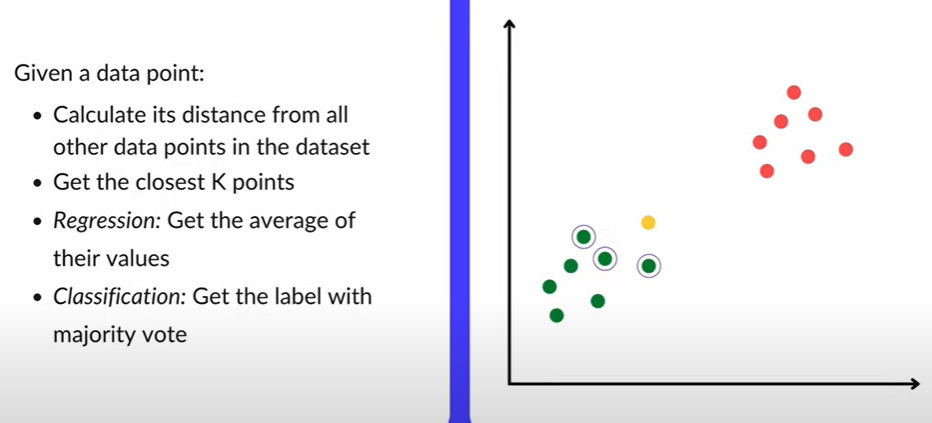
<br>
How to choose Value of K: <br>
1) Size of Dataset: if small -> smaller K , if big number of Features -> bigger K <br>
2) Use the Elbow Method: 


<b>-----------------------------------------------------------------------------------------------------------------</b><br>
<b>Regularization Explained</b>
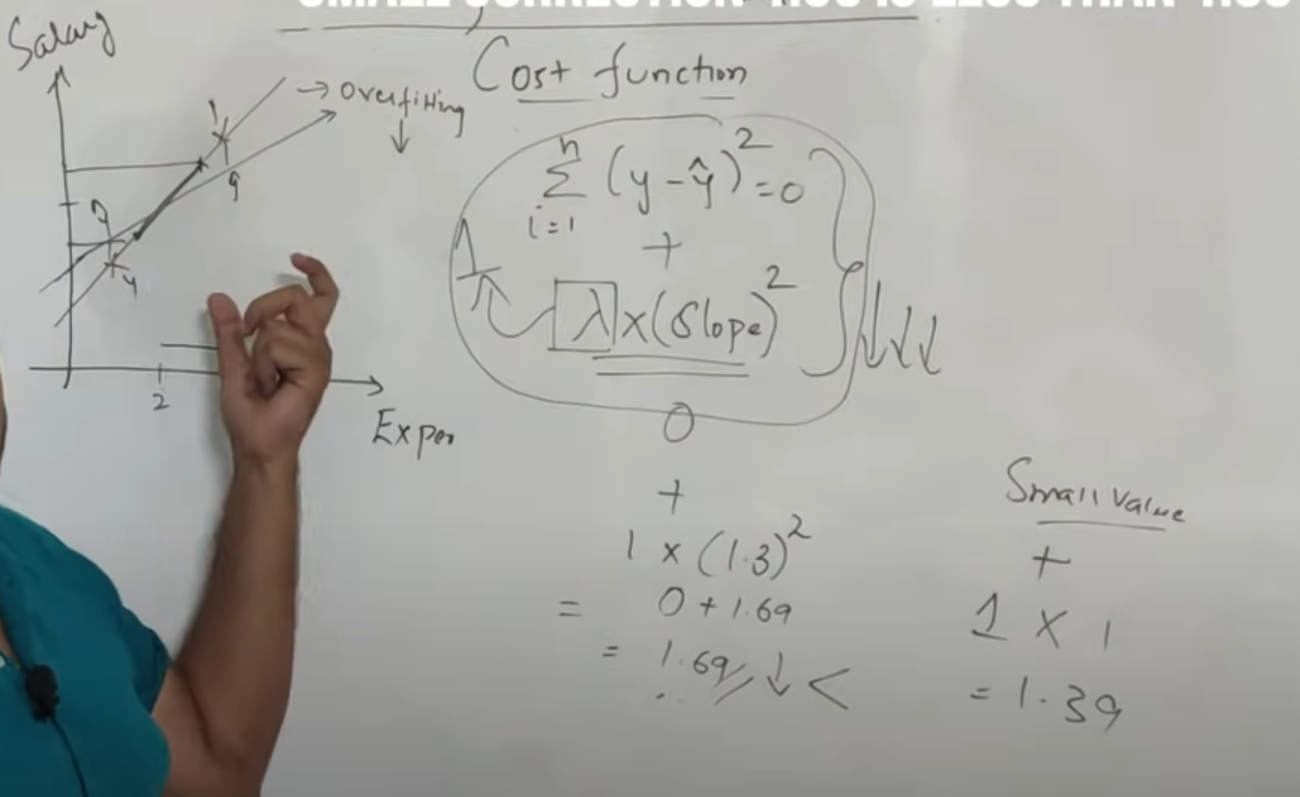
<br>
Types of Regularization: Ridge & Lasso Regularizations <br> 
   - Keep calculating Cost Function with the addition of calculating Slop of regression line
   - Change Regression Line placement and recalculate slop and cost function
   - if cost function is less, make that Regression Line the new best fit line 
   - Add penalty term to the cost function (also known as lambda or alpha)
   - The difference between Ridge & Laso are in the way they calculate and use the penalty <br>
   1) Ridge: 
       - Lambda = Sum of squared coefficients, therefor all coefficients are penalized equally
       - Shrinks coefficients closer to 0
   
   2) Lasso: 
       - Lambda = Sum of absolute values of coefficients, therefor coefficients are penalized depending on the larger they are
       - Shrinks some coefficients closer to 0, and others to a smaller value, 
       - this means that it can be used for feature selection as it identifies the important features
   

<h3> This Project works by Importing your CSV file <br> and then choosing what Machine Learning Classifier you want to see

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#Misc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Classifiers
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV


<h2> Terminal without GUI

In [2]:
df_name = "diabetes_with_NA.csv"
df_original = pd.read_csv(f"CSVs/{df_name}")

# This df is simply a copy for me to transform it however I want 
df = df_original
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,fsdf,sdf,sdfasd,abvb,fdsfd,asdsfbv,asdvcxxcv,asdv,adsxc
0,6,148,72.0,35,0.0,33.6,0.627,50,1,6,148.0,72,35.0,0.0,33.6,0.627,50,1
1,1,85,66.0,29,0.0,26.6,0.351,31,0,1,85.0,66,29.0,0.0,26.6,0.351,31,0
2,8,183,64.0,0,0.0,23.3,0.672,32,1,8,183.0,64,0.0,0.0,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0,1,89.0,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1,0,137.0,40,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48,180.0,32.9,0.171,63,0,10,101.0,76,48.0,180.0,32.9,0.171,63,0
764,2,122,70.0,27,0.0,36.8,0.340,27,0,2,122.0,70,27.0,0.0,36.8,0.340,27,0
765,5,121,72.0,23,112.0,26.2,0.245,30,0,5,121.0,72,23.0,112.0,26.2,0.245,30,0
766,1,126,60.0,0,0.0,30.1,0.349,47,1,1,126.0,60,0.0,0.0,30.1,0.349,47,1


In [36]:
#Import the required libraries
from tkinter import *

#Create an instance of tkinter frame
win= Tk()

#Set the geometry of frame
win.geometry("600x250")

#Create a frame
frame = Frame(win)
frame.pack(side="top", expand=True, fill="both")

#Create a text label
Label(frame,text="Enter the Password", font=('Helvetica',20)).pack(pady=20)

def clear_frame():
   for widgets in frame.winfo_children():
      widgets.destroy()

#Create a button to close the window
Button(frame, text="Clear", font=('Helvetica bold', 10), command=
clear_frame).pack(pady=20)

win.mainloop()

In [27]:
# Transform the Data to remove the Unwanted Object Columns (They will still exist in the df_original but removed in df)
while True:
    for column in df.columns:
        if (df[column].dtype == np.float64 or df[column].dtypes == np.int64):
            print(f"Column ({column}) is int or float")
        else:
            try:
                should_encode_or_remove_column = int(input(f"{column} Column is not int or float, What do you want to do to column?:\n 1) One Hot Encode Column \n 2) Remove Column \n"))
                if(should_encode_or_remove_column == 2):
                    print(f"Column ({column}) has been dropped")
                    df = df.drop(column, axis=1)
                elif(should_encode_or_remove_column == 1):
                    label_encoder = LabelEncoder()
                    df[column] = label_encoder.fit_transform(df[column])
                    print(f"{column} Column has been encoded")
                else:
                    print("Please Select 1 or 2")
            except ValueError:
                print("Please input an integer")
    break

Column (Pregnancies) is int or float
Column (Glucose) is int or float
Column (BloodPressure) is int or float
Column (SkinThickness) is int or float
Column (Insulin) is int or float
Column (BMI) is int or float
Column (DiabetesPedigreeFunction) is int or float
Column (Age) is int or float
Column (Outcome) is int or float
Column (fsdf) is int or float
Column (sdf) is int or float
Column (sdfasd) is int or float
Column (abvb) is int or float
Column (fdsfd) is int or float
Column (asdsfbv) is int or float
Column (asdvcxxcv) is int or float
Column (asdv) is int or float
Column (adsxc) is int or float


In [ ]:
# Checks if any of the columns have null Values
for column in df.columns:
    if df[column].isnull().any() == True:
        print(f"Column {column} has Null Value")
        null_values_delt = int(input("Would you like to: \n 1) Fill Null Values with the mean \n 2) remove row \n"))
        
        if null_values_delt == 1: #fill Null with mean
            mean = df[column].mean()
            df[column].fillna(value=mean, inplace=True)
            
        elif null_values_delt == 2: #Drop Row
            df.dropna(subset = [column], inplace=True)
            

df

In [93]:
#Choose the Target
for i, column in enumerate(df.columns):
    print(f"{i}: {column}")

while True:
    try:
        target_index = int(input("Select The Target Column (Input the Index): "))
        target_column = df.columns[target_index]

        print("----------------------")
        print(f"You have selected ({target_column}) as the Target")

        break

    except IndexError:
        print("----------------------")
        print(f"Please select an index between 0 - {i}")
        
    except ValueError:
        print("----------------------")
        print("Please Input an Integer")


# x is the Training Columns
# y is the Target Column
x = df.drop([target_column], axis=1)
y = df[target_column]


0: satisfaction_level
1: last_evaluation
2: number_project
3: average_montly_hours
4: time_spend_company
5: Work_accident
6: left
7: promotion_last_5years
8: Department
9: salary
Select The Target Column (Input the Index): 6
----------------------
You have selected (left) as the Target


In [98]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,8,1
14995,0.37,0.48,2,160,3,0,0,8,1
14996,0.37,0.53,2,143,3,0,0,8,1
14997,0.11,0.96,6,280,4,0,0,8,1


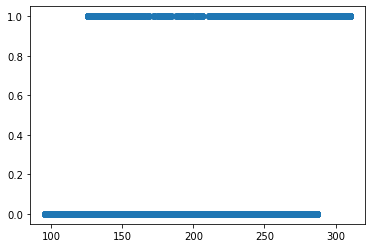

In [100]:
plt.scatter(x["average_montly_hours"], y)

<h3> KNN

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
                        # p=2 because the prediction will only be between 2 choices
classifier = KNeighborsClassifier(n_neighbors=20, p=3, metric="euclidean")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Confusion Matrix <br>", confusion_matrix(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

D:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<h3> Logistic Regression

In [46]:
#for splitting, testing,and doing metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# We do metrics on both test and train data to make sure data isnt Overfitting 
# (if the difference is big --> Overfitting) (test and train metrics should be close)
# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_pred)
test_percision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Test Score: {model.score(X_test, y_test)}")
print("Test Accuracy:", test_accuracy)
print("Test Percision:", test_percision)
print("Test Recall:", test_recall)
print("Test F1:", test_f1)


# Calculate evaluation metrics for train data
# train_accuracy = accuracy_score(y_train, y_pred)  
# train_percision = precision_score(y_train, y_pred)
# train_recall = recall_score(y_train, y_pred)
# train_f1 = f1_score(y_train, y_pred)

# Print the evaluation metrics
# print(f"Test Score: {model.score(X_test, y_test)}, Training Score: {model.score(X_train, y_train)}")
# print("Test Accuracy:", train_accuracy, ", Training: ", train_accuracy)
# print("Test Percision:", test_percision, ", Training: ", train_percision)
# print("Test Recall:", test_recall, ", Training: ", train_recall)
# print("Test F1:", test_f1, ", Training: ", train_f1)




Test Score: 0.7606666666666667
Test Accuracy: 0.7606666666666667
Test Percision: 0.4951644100580271
Test Recall: 0.23880597014925373
Test F1: 0.3222152297042165


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# If you want to input the Values for Prediction Yourself
prediction_values_list = []

while True:
    try:
        for column in x:
            prediction_values = float(input(f"Input Prediction Value for ({column}) Column: "))
            prediction_values_list.append(prediction_values)
        
        break
        
    except ValueError:
        prediction_values_list.clear()
        print("Please Input an Integer")
        
print(f"Prediction: {model.predict([prediction_values_list])}")

Input Prediction Value for (satisfaction_level) Column: 0.38
Input Prediction Value for (last_evaluation) Column: 0.53
Input Prediction Value for (number_project) Column: 2
Input Prediction Value for (average_montly_hours) Column: 157
Input Prediction Value for (time_spend_company) Column: 3
Input Prediction Value for (Work_accident) Column: 0
Input Prediction Value for (promotion_last_5years) Column: 0
Input Prediction Value for (salary) Column: 0
Prediction: [0]


<h3> Linear Regression

In [8]:
#for splitting, testing,and doing metrics
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# We do metrics on both test and train data to make sure data isnt Overfitting 
# (if the difference is big --> Overfitting) (test and train metrics should be close)
# Calculate evaluation metrics for test data
test_mse = mean_squared_error(y_test, y_pred)   #MSE: Average of --> (Difference between real and predicted Data)^2
test_rmse = np.sqrt(test_mse)                        
test_mae = mean_absolute_error(y_test, y_pred)  #MAE = Average of --> |Difference between real and predicted Data| (absolute it)
test_r_squared = r2_score(y_test, y_pred)       #r2: How close is the predicted data to the regression line 

# Calculate evaluation metrics for train data
mse_train = mean_squared_error(y_train, y_pred)   
rmse_train = np.sqrt(mse_train)                        
mae_train = mean_absolute_error(y_train, y_pred)  
r_squared_train = r2_score(y_train, y_pred)

# Print the evaluation metrics
print("Test Score: ", model.score(X_test, y_test), ", Training Score: ", model.score(X_train, y_train))
print("Test MSE:", test_mse, ", Training: ", mse_train)
print("Test RMSE:", test_rmse, ", Training: ", rmse_train)
print("Test MAE:", test_mae, ", Training: ", mae_train)
print("Test R-Squared:", test_r_squared, ", Training: ", r_squared_train)


Test Score:  0.9136821722142972 , Training Score:  0.9218119775026773
Test MSE: 10270867039.318964 , Training:  245474976409.36365
Test RMSE: 101345.28622150596 , Training:  495454.31314033753
Test MAE: 81528.38579563895 , Training:  392030.2501187619
Test R-Squared: 0.9136821722142972 , Training:  -0.8856538255159432


In [23]:
#Regularization
#Lasso
lasso = Lasso(alpha=50, max_iter=100, tol=0.1)
lasso.fit(X_train, y_train)

print(mean_absolute_error(y_train, lasso.predict(X_train)))
print(mean_absolute_error(y_test, lasso.predict(X_test)))


#Ridge
ridge = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge.fit(X_train, y_train)

print(mean_absolute_error(y_train, ridge.predict(X_train)))
print(mean_absolute_error(y_test, ridge.predict(X_test)))


#If we have multiple alphas or lambdas and we want to know which one to use
# parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
# grid_search = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error')

# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print("Best Ridge:", grid_search.best_params_)

81249.51276569626
81499.65645929574
81353.43994704154
81697.16172407947


In [14]:
# If you want to input the Values for Prediction Yourself
prediction_values_list = []

while True:
    try:
        for column in x:
            prediction_values = float(input(f"Input Prediction Value for {column}: "))
            prediction_values_list.append(prediction_values)
        
        break
        
    except ValueError:
        prediction_values_list.clear()
        print("Please Input an Integer")

Input Prediction Value for Avg. Area Income: 234
Input Prediction Value for Avg. Area House Age: 234
Input Prediction Value for Avg. Area Number of Rooms: 234
Input Prediction Value for Avg. Area Number of Bedrooms: 234
Input Prediction Value for Area Population: 234


In [15]:
def LinearRegression(x, y, prediction_values_list):
    model = linear_model.LinearRegression()
    model.fit(x, y)
    
    #Rule: m1*area + m2*bedrooms + m3*age + b
    print("coefficiants: ", model.coef_) #m1,m2,m3
    print("intercept: ", model.intercept_) #b
    
    print("------------------")
    print(f"Prediction: {model.predict([prediction_values_list])}")
    
LinearRegression(x,y, prediction_values_list)

coefficiants:  [2.15780494e+01 1.65637027e+05 1.20659949e+05 1.65113905e+03
 1.52007439e+01]
intercept:  -2637299.033331454
------------------
Prediction: [64751166.06998192]


<h3> Terminal App

In [193]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split


#Classifiers
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV



###################################################################
df_path = "USA_Housing.csv"
df_original = pd.read_csv(df_path)

# This df is simply a copy for me to transform it however I want 
df = df_original

def Regression_Models():
    global df
    
    #Transform the Data to remove the Unwanted Object Columns (They will still exist in the df_original but removed in df)
    print("Transforming Data: \n")
    for column in df.columns:
        if (df[column].dtype == np.float64 or df[column].dtypes == np.int64):
            print(f"({column}) Column is int or float")
        else:
            print(f"({column}) Column has been dropped")
            df = df.drop(column, axis=1)
    print("----------------------")
    ##############################
    # Checks if any of the columns have null Values
    for column in df.columns:
        if df[column].isnull().any() == True:
            print(f"Column {column} has Null Value")
            null_values_delt = int(input("Would you like to: \n 1) Fill Null Values with the mean \n 2) remove row \n"))

            if null_values_delt == 1: #fill Null with mean
                mean = df[column].mean()
                df[column].fillna(value=mean, inplace=True)

            elif null_values_delt == 2: #Drop Row
                df.dropna(subset = [column], inplace=True)
    print("------------------------------------------------------------------")
    ###############################################        
    #Choose the Target
    print("Choose Target Column: \n")
    
    for i, column in enumerate(df.columns):
        print(f"{i}: {column}")
        
    while True:
        try:
            target_index = int(input("Select The Target Column (Input the Index): "))
            target_column = df.columns[target_index]

            print("----------------------")
            print(f"You have selected ({target_column}) as the Target")

            break

        except IndexError:
            print("----------------------")
            print(f"Please select an index between 0 - {i}")

        except ValueError:
            print("----------------------")
            print("Please Input an Integer")


    # x is the Training Columns
    # y is the Target Column
    x = df.drop([target_column], axis=1)
    y = df[target_column]
    
    print("------------------------------------------------------------------")
    ###############################################
    #for splitting & Choosing which Regression Model
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
    
    #All Regression Models
    def Linear_Regression():
        model = linear_model.LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # We do metrics on both test and train data to make sure data isnt Overfitting 
        # (if the difference is big --> Overfitting) (test and train metrics should be close)
        # Calculate evaluation metrics for test data
        test_mse = mean_squared_error(y_test, y_pred)   #MSE: Average of --> (Difference between real and predicted Data)^2
        test_rmse = np.sqrt(test_mse)                        
        test_mae = mean_absolute_error(y_test, y_pred)  #MAE = Average of --> |Difference between real and predicted Data| (absolute it)
        test_r_squared = r2_score(y_test, y_pred)       #r2: How close is the predicted data to the regression line 

        # Calculate evaluation metrics for train data
        mse_train = mean_squared_error(y_train, y_pred)   
        rmse_train = np.sqrt(mse_train)                        
        mae_train = mean_absolute_error(y_train, y_pred)  
        r_squared_train = r2_score(y_train, y_pred)

        # Print the evaluation metrics
        print("Test Score: ", model.score(X_test, y_test), ", Training Score: ", model.score(X_train, y_train))
        print("Test MSE:", test_mse, ", Training: ", mse_train)
        print("Test RMSE:", test_rmse, ", Training: ", rmse_train)
        print("Test MAE:", test_mae, ", Training: ", mae_train)
        print("Test R-Squared:", test_r_squared, ", Training: ", r_squared_train)

        ##############################
        #input own numbers to predict or change regression models
        print("----------------------")
        def Input_Numbers_To_Predict_Or_Go_Back():
            input_numbers_to_predict_or_go_back = int(input("What Would You like to Do: \n\n 1) Input your own numbes to predict using the same model \n 2) Try a different Regression Model \n 3) Exit App \n"))

            if input_numbers_to_predict_or_go_back == 1: #input number
                prediction_values_list = []
                while True:
                    try:
                        for column in x:
                            prediction_values = float(input(f"Input Prediction Value for {column}: "))
                            prediction_values_list.append(prediction_values)

                        break
                    except ValueError:
                        prediction_values_list.clear()
                        print("Please Input an Integer")

                #print out prediction
                print("----------------------")
                print(f"Prediction: {model.predict([prediction_values_list])}")
                
                #repeat again
                Input_Numbers_To_Predict_Or_Go_Back()
                
            elif input_numbers_to_predict_or_go_back == 2: #choose another model
                Which_Regression_Model()
            elif input_numbers_to_predict_or_go_back == 3: #exit app
                pass
        Input_Numbers_To_Predict_Or_Go_Back()
    ##################################
#     def SRV_Regression():
    def Which_Regression_Model():
        which_regression_model = int(input("Choose which Regression Model: \n\n 1) Linear Regression \n 2) Support Vector Regression (SVR) \n"))
        print("------------------------------------------------------------------")

        if which_regression_model == 1:
            Linear_Regression()
    #     elif which_regression_model == 2:
    #         SVR_Regression()
    Which_Regression_Model()
    print("------------------------------------------------------------------")


###########################################################################################################################
def Regression_Or_Classification():
    regression_or_classification = int(input("Choose Model Type: \n\n 1) Regression Models \n 2) Classification Models \n"))
    print("------------------------------------------------------------------")
    
    if regression_or_classification == 1:
        Regression_Models()
    
    
Regression_Or_Classification()

Choose Model Type: 

 1) Regression Models 
 2) Classification Models 
1
------------------------------------------------------------------
Transforming Data: 

(Avg. Area Income) Column is int or float
(Avg. Area House Age) Column is int or float
(Avg. Area Number of Rooms) Column is int or float
(Avg. Area Number of Bedrooms) Column is int or float
(Area Population) Column is int or float
(Price) Column is int or float
------------------------------------------------------------------
Choose Target Column: 

0: Avg. Area Income
1: Avg. Area House Age
2: Avg. Area Number of Rooms
3: Avg. Area Number of Bedrooms
4: Area Population
5: Price
Select The Target Column (Input the Index): 5
----------------------
You have selected (Price) as the Target
------------------------------------------------------------------
Choose which Regression Model: 

 1) Linear Regression 
 2) Support Vector Regression (SVR) 
1
------------------------------------------------------------------
Test MSE: 1027